# importing needed packages

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt



# reading the data

In [30]:
df=pd.read_csv("F:\DATA\MAIN\/Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# turning Male & Female to 1 , 0 

In [42]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust_km,clust_La with AGG,clust_La with DBSCAN
0,1,0,19,15,39,4,1,-1
1,2,0,21,15,81,2,1,0
2,3,0,20,16,6,4,4,-1
3,4,0,23,16,77,2,1,0
4,5,0,31,17,40,4,3,-1


# Pre processing  (Normalize)

In [ ]:
x = df.drop('CustomerID' ,  axis=1)
Scaler= preprocessing.StandardScaler().fit_transform(x) 


# Modeling with K_Means

In [44]:

from sklearn.cluster import KMeans
KM=KMeans(init='k-means++' ,  n_clusters=5 , n_init=12).fit(x)
df['clust_km']= KM.labels_
df.groupby('clust_km').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust_La with AGG,clust_La with DBSCAN
clust_km,,,,,,,
0,86.265823,0.0,43.088608,55.291139,49.569620,1.898734,-0.645570
1,24.000000,0.0,25.521739,26.304348,78.565217,1.347826,-0.782609
2,162.000000,0.0,32.692308,86.538462,82.128205,1.102564,-0.487179
3,163.500000,0.0,40.666667,87.750000,17.583333,0.277778,-1.000000
4,23.000000,0.0,45.217391,26.304348,20.913043,1.347826,-1.000000


# Now let's draw the scatter plot 
### bigger circle means higher spending score

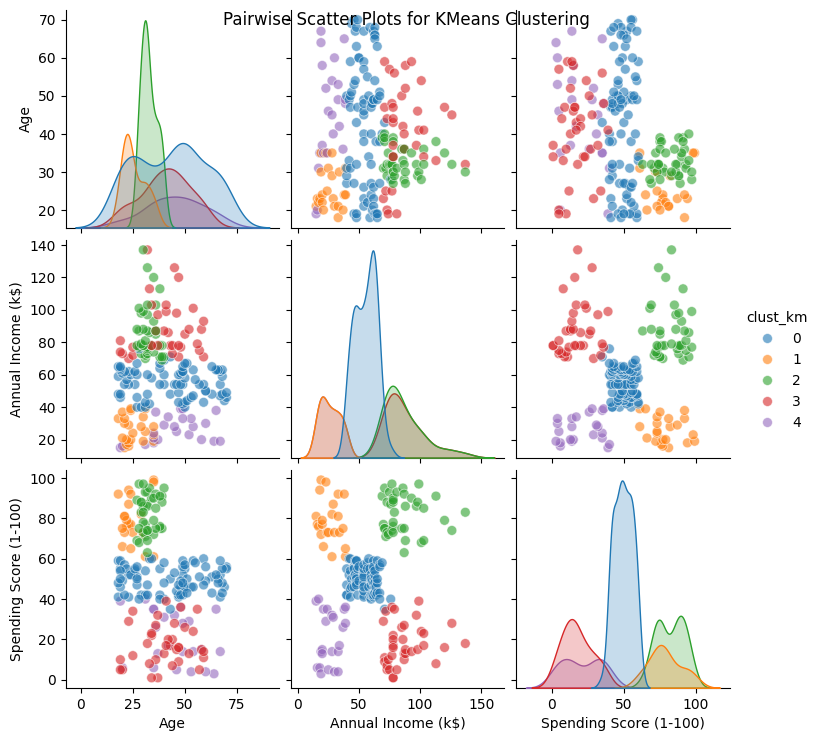

In [66]:
import seaborn as sns
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
sns.pairplot(df, vars=features, hue='clust_km', palette='tab10', plot_kws={'alpha': 0.6, 's': 50})
plt.suptitle('Pairwise Scatter Plots for KMeans Clustering')
plt.show()

# modeling with hierarchical

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy 
from sklearn.cluster import AgglomerativeClustering 
dist_matrix=euclidean_distances( Scaler , Scaler)
Z= hierarchy.linkage(dist_matrix, 'complete')

agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
agglom.fit(dist_matrix)



C:\Users\korosh king\AppData\Local\Temp\ipykernel_580\1047078554.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z= hierarchy.linkage(dist_matrix, 'complete')
c:\Users\korosh king\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:584: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


,n_clusters,4
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'complete'
,distance_threshold,None
,compute_distances,False


# Adding label and showing average clusters

In [ ]:
AGG=agglom.labels_
df['clust_La with AGG']= AGG

df.groupby('clust_La with AGG').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust_km,clust_La with DBSCAN
clust_La with AGG,,,,,,,
0,133.784615,0.0,49.015385,76.738462,34.492308,1.692308,-1.000000
1,91.259615,0.0,32.250000,55.884615,65.115385,0.971154,-0.951923
2,25.300000,0.0,47.750000,27.600000,18.350000,4.000000,-1.000000
3,127.909091,0.0,25.000000,69.090909,59.909091,0.909091,1.454545


# dendogram 

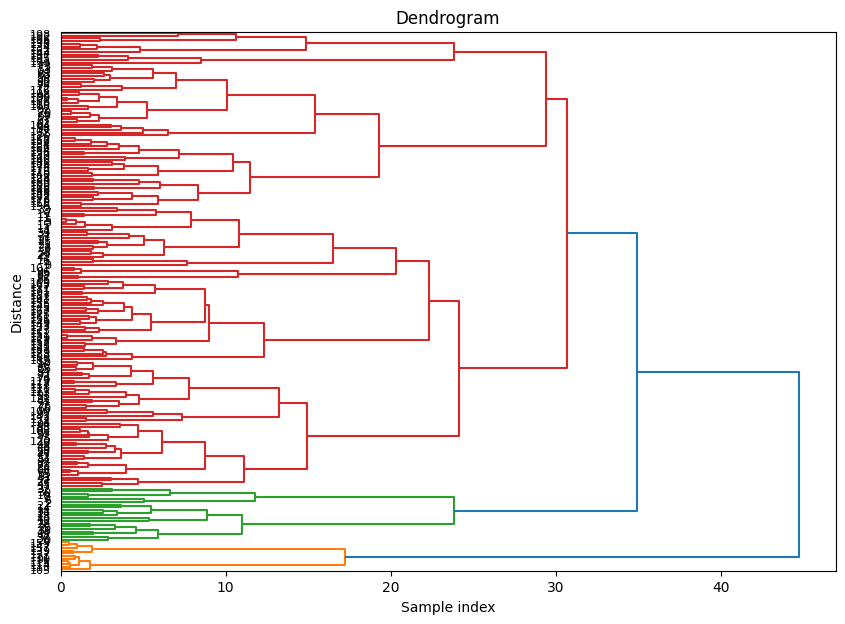

In [107]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z,orientation='right', leaf_rotation=0, leaf_font_size=8.)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Modeling with DBSCAN

In [108]:
from sklearn.cluster import DBSCAN
R=5
M=5
DB=DBSCAN(eps=R , min_samples=M ).fit(x)
DB_lables=DB.labels_


In [109]:
DBB=DB.labels_
df['clust_La with DBSCAN']= DBB
df.groupby('clust_La with DBSCAN').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust_km,clust_La with AGG
clust_La with DBSCAN,,,,,,,
-1,101.36413,0.0,40.125000,61.217391,48.864130,1.554348,0.755435
0,8.40000,0.0,22.400000,17.600000,78.000000,1.000000,1.000000
1,110.50000,0.0,19.333333,63.333333,48.166667,0.000000,3.000000
2,148.80000,0.0,31.800000,76.000000,74.000000,2.000000,3.000000


# 3D plot

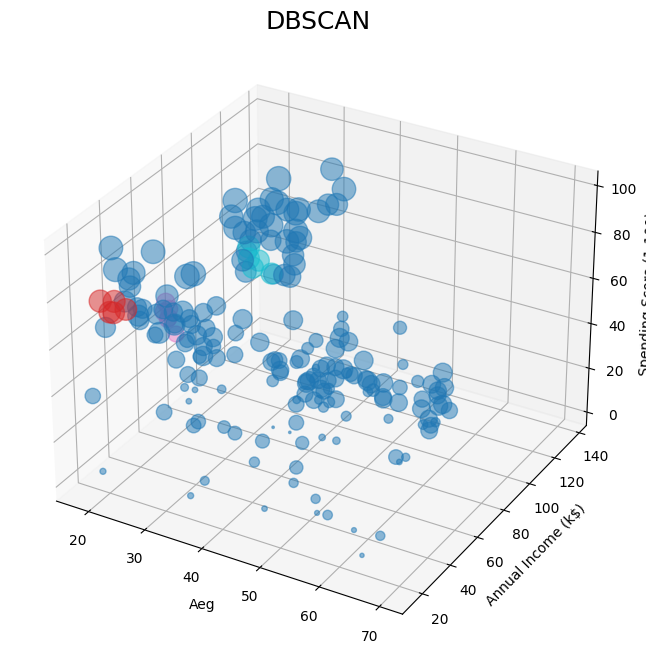

In [110]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

area = np.pi * (x['Spending Score (1-100)'])

scatter = ax.scatter(x['Age'], x['Annual Income (k$)'], x['Spending Score (1-100)'],
                    s=area, c=DB.labels_, alpha=0.5, cmap='tab10')

ax.set_xlabel('Aeg')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('DBSCAN', fontsize=18)


plt.show()

## Based on this program, we found that the best  models are K_Means and Hierarchial . Additionally, by adjusting the parameters, I realized that the best linkage for Hierarchial is 'complete'.But DBSCAN is not a correct model for this data frame :)) .
